# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [68]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [69]:
#Separando apenas as colunas de interesse
sinasc1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc1.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [70]:
#TOTAL DE LINHAS
sinasc1.shape

(27028, 3)

In [71]:
#CRIANÇAS QUE NASCERAM COM A IDADE DA MÃE EM BRANCO 
sinasc1.IDADEMAE.isna().sum()

0

In [72]:
#CRIANÇAS QUE NASCERAM COM A IDADE DO PAI EM BRANCO 
sinasc1.IDADEPAI.isna().sum()

19421

In [73]:
#PORCENTAGEM DE CRIANÇAS SEM OS DADOS DA IDADE DO PAI
porcentagem = (19421 / 27028) * 100
print(f'{porcentagem:.2f}% das linhas do data frame estão com os dados da idade do pai em branco.')

71.86% das linhas do data frame estão com os dados da idade do pai em branco.


In [74]:
#BEBÊS QUE NASCERAM COM IDADE DO PAI NA TABELA
na_dropados = sinasc1.dropna()
linhas_co = na_dropados.shape[0]
print(f'Poderemos trabalhar apenas com {linhas_co} das linhas do dataframe.')

Poderemos trabalhar apenas com 7607 das linhas do dataframe.


In [75]:
#IDADE MEDIA DAS MÃES E DOS PAIS POR MUNICÍPIO
result = sinasc1.dropna().groupby('munResNome').mean()
result

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.892857,29.548701
Alto Alegre dos Parecis,24.679104,29.179104
Alto Paraíso,22.833333,28.833333
Alvorada D'Oeste,26.825243,30.757282
Ariquemes,28.133333,32.466667
Buritis,24.750000,30.812500
Cabixi,32.166667,34.333333
Cacaulândia,31.000000,36.333333
Cacoal,26.978605,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [76]:
#SEPARANDO APENAS AS COLUNAS DE INTERESSE
sinasc2 = sinasc_raw[['DTNASC', 'SEXO', 'ESCMAE', 'PESO']]
sinasc2

,DTNASC,SEXO,ESCMAE,PESO
0,2019-02-19,Masculino,8 a 11 anos,3685
1,2019-02-21,Feminino,8 a 11 anos,3055
2,2019-02-25,Feminino,8 a 11 anos,3460
3,2019-03-20,Feminino,12 anos ou mais,2982
4,2019-03-23,Feminino,8 a 11 anos,3310
...,...,...,...,...
27023,2019-12-13,Masculino,12 anos ou mais,2110
27024,2019-10-04,Masculino,8 a 11 anos,3310
27025,2019-08-02,Masculino,8 a 11 anos,3065
27026,2019-12-23,Masculino,8 a 11 anos,2352


In [77]:
#CRIANÇAS QUE NASCERAM COM A IDADE DA MÃE EM BRANCO 
print(sinasc2['ESCMAE'].isna().sum())

312


In [78]:
#CRIANÇAS QUE NASCERAM COM O SEXO BRANCO 
sinasc2.SEXO.isna().sum()

4

In [79]:
#CRIANÇAS QUE NASCERAM COM O PESO EM BRANCO 
sinasc2['PESO'].isna().sum()

0

In [80]:
#CRIANÇAS QUE NASCERAM COM A DATA DE NASCIMENTO EM BRANCO 
sinasc2['DTNASC'].isna().sum()

0

In [81]:
#LIMPANDO OS DADOS EM BRANCO DA COLUNAS
sinasc2.dropna()

,DTNASC,SEXO,ESCMAE,PESO
0,2019-02-19,Masculino,8 a 11 anos,3685
1,2019-02-21,Feminino,8 a 11 anos,3055
2,2019-02-25,Feminino,8 a 11 anos,3460
3,2019-03-20,Feminino,12 anos ou mais,2982
4,2019-03-23,Feminino,8 a 11 anos,3310
...,...,...,...,...
27023,2019-12-13,Masculino,12 anos ou mais,2110
27024,2019-10-04,Masculino,8 a 11 anos,3310
27025,2019-08-02,Masculino,8 a 11 anos,3065
27026,2019-12-23,Masculino,8 a 11 anos,2352


In [82]:
#FILTRANDO A DATA PARA O DIA DO MEU ANIVERSÁRIO (26/04)
aniv_filtrado = sinasc2[sinasc2['DTNASC'] == '2019-04-26']

In [83]:
#PESO MÉDIO DOS BEBES POR SEXO QUE NASCERAM NO DIA DO MEU ANIVERSÁRIO POR FAIXAS DE ESCOLARIDADE MAE
aniv_filtrado = aniv_filtrado.groupby(['ESCMAE','SEXO'])['PESO'].mean().unstack()
aniv_filtrado

SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,3205.000000,NaN
12 anos ou mais,2850.857143,3329.545455
4 a 7 anos,3149.000000,3430.000000
8 a 11 anos,3265.000000,3330.454545


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [84]:
#VISUALIZANDO QUAIS MUNICIPIOS QUE NASCERAM MENOS BEBES
print(sinasc_raw['munResNome'].value_counts().sort_values().head(5))
print("Desconsiderando a linha 'Município ignorado - RO' que possui"
      " apenas um nascimento regsitrado,\niremos analisar os dados de Castanheiras- RO.")

munResNome
Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: count, dtype: int64
Desconsiderando a linha 'Município ignorado - RO' que possui apenas um nascimento regsitrado,
iremos analisar os dados de Castanheiras- RO.


In [85]:
#FILTRANDO APENAS A CIDADE DE CASTANHEIRAS
castanheiras =  sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras']

In [86]:
#FILTRANDO IDADE MÉDIA DAS MÂES
idades_maes = castanheiras.groupby('munResNome')['IDADEMAE'].mean()
idades_maes

munResNome
Castanheiras    27.28125
Name: IDADEMAE, dtype: float64

In [87]:
#FILTRANDO IDADE MÉDIAS DOS PAIS
idades_pais = castanheiras.groupby('munResNome')['IDADEPAI'].mean()
idades_pais

munResNome
Castanheiras    30.392857
Name: IDADEPAI, dtype: float64

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [88]:
#VISUALIZANDO QUAIS MUNICIPIOS QUE NASCERAM MAIS BEBES
print(sinasc_raw['munResNome'].value_counts().sort_values(ascending=False).head(5))
print("Porto Velho foi o municipio que mais nasceu bebes no estado de Rondônia.")

munResNome
Porto Velho    8437
Ji-Paraná      2182
Ariquemes      1729
Vilhena        1590
Cacoal         1374
Name: count, dtype: int64
Porto Velho foi o municipio que mais nasceu bebes no estado de Rondônia.


In [89]:
#FILTRANDO APENAS A CIDADE DE PORTO VELHO
porto_velho =  sinasc_raw[sinasc_raw['munResNome'] == 'Porto Velho']

In [90]:
#FILTRANDO IDADE MÉDIA DAS MÂES
idades_maes = porto_velho.groupby('munResNome')['IDADEMAE'].mean()
idades_maes

munResNome
Porto Velho    26.31267
Name: IDADEMAE, dtype: float64

In [91]:
#FILTRANDO IDADE MÉDIAS DOS PAIS
idades_pais = porto_velho.groupby('munResNome')['IDADEPAI'].mean()
idades_pais

munResNome
Porto Velho    32.352679
Name: IDADEPAI, dtype: float64

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [92]:
sinasc_raw.dtypes.value_counts()

float64    38
int64      16
object     15
Name: count, dtype: int64

In [93]:
so_str= sinasc_raw.select_dtypes(exclude=['int64','float64']).head()
so_str

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia


In [94]:
so_str.columns

Index(['ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'DTNASC', 'SEXO', 'RACACOR',
       'DTCADASTRO', 'CODANOMAL', 'VERSAOSIST', 'DTRECEBIM', 'munResStatus',
       'munResTipo', 'munResNome', 'munResUf'],
      dtype='object')

In [95]:
sem_str = sinasc_raw.select_dtypes(exclude=['object'])
sem_str

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,NaN,0.0,0.0,110001,...,1,1,1,0,5,1,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,2,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,513205.0,2.0,0.0,110001,...,1,1,7,1,5,3,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,231205.0,0.0,0.0,110037,...,1,1,2,0,4,4,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,5,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,333115.0,1.0,0.0,110030,...,1,1,7,1,5,2767632,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,999992.0,0.0,0.0,110092,...,1,1,1,0,5,2772678,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,421125.0,0.0,1.0,110030,...,1,1,3,1,5,2776905,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,999992.0,1.0,0.0,110030,...,1,1,10,1,5,2777105,-12.74137,-60.13858,595.0,11518.915


In [96]:
sem_str.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

In [101]:
sinasc = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI'
]].copy()
sinasc

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0
...,...,...,...,...,...,...,...,...,...,...,...
27023,32,Masculino,8.0,9.0,2110,4,2019-12-13,32 a 36 semanas,Única,12 anos ou mais,35.0
27024,19,Masculino,8.0,9.0,3310,4,2019-10-04,37 a 41 semanas,Única,8 a 11 anos,NaN
27025,24,Masculino,9.0,10.0,3065,4,2019-08-02,37 a 41 semanas,Única,8 a 11 anos,30.0
27026,21,Masculino,8.0,9.0,2352,4,2019-12-23,32 a 36 semanas,Única,8 a 11 anos,24.0


Text(0, 0.5, 'N° DE NASCIMENTOS')

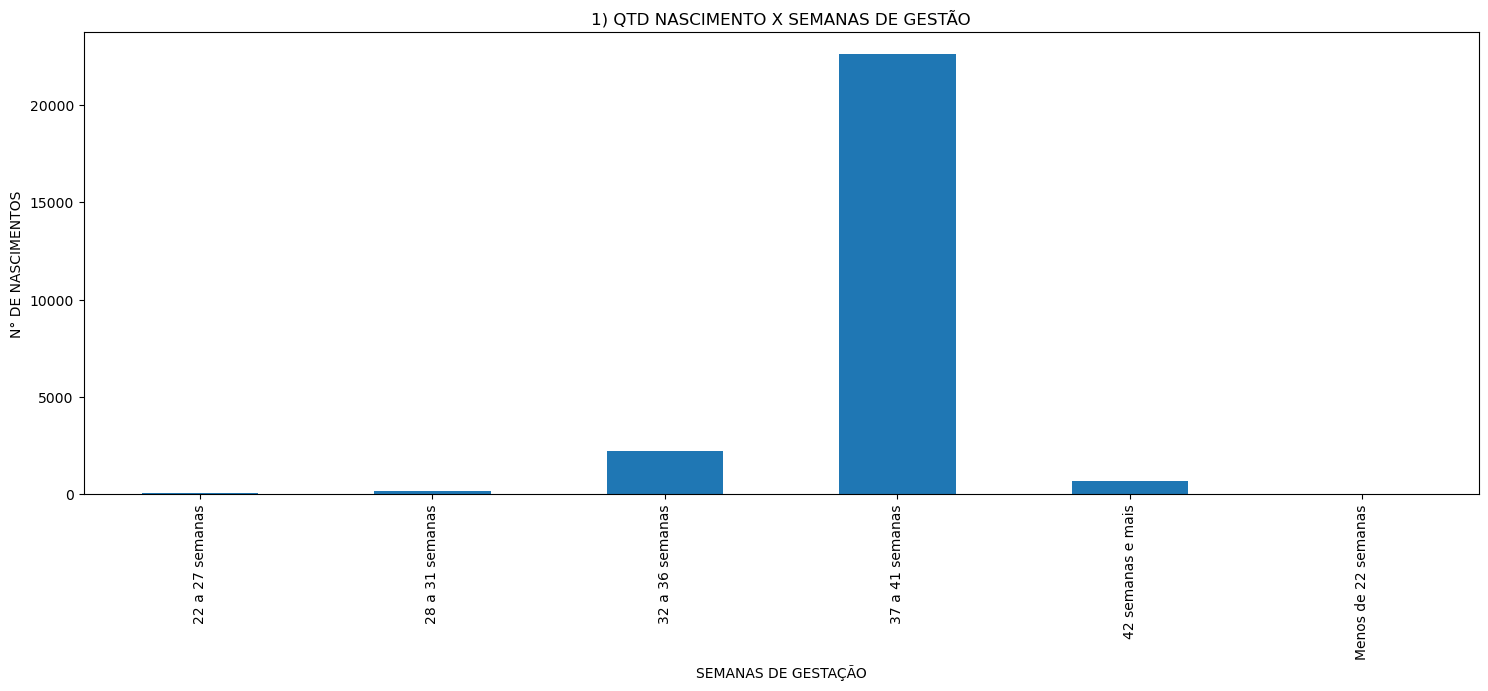

In [192]:
resultado = sinasc.groupby('GESTACAO')['IDADEMAE'].count().plot(kind= 'bar',figsize=[18,6])
plt.title('1) QTD NASCIMENTO X SEMANAS DE GESTÃO')
plt.xlabel('SEMANAS DE GESTAÇÃO')
plt.ylabel('N° DE NASCIMENTOS')

Text(0, 0.5, 'MÉDIA DA IDADE DAS MÂES')

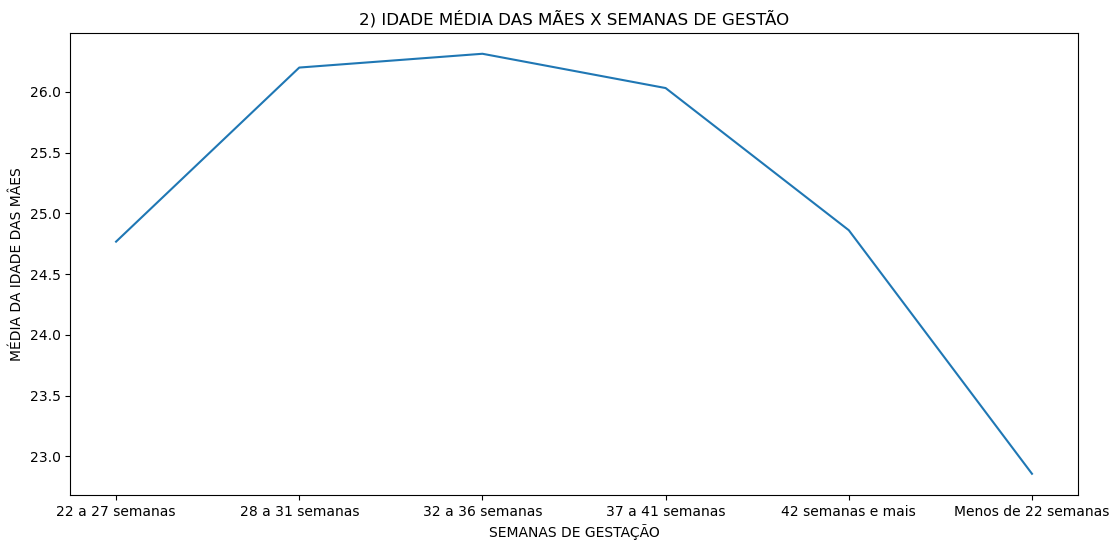

In [191]:
resultado = sinasc.groupby('GESTACAO')['IDADEMAE'].mean().plot(figsize=[13,6])
plt.title('2) IDADE MÉDIA DAS MÃES X SEMANAS DE GESTÃO')
plt.xlabel('SEMANAS DE GESTAÇÃO')
plt.ylabel('MÉDIA DA IDADE DAS MÂES')

Text(0, 0.5, 'MÉDIA DA IDADE DOS PAIS')

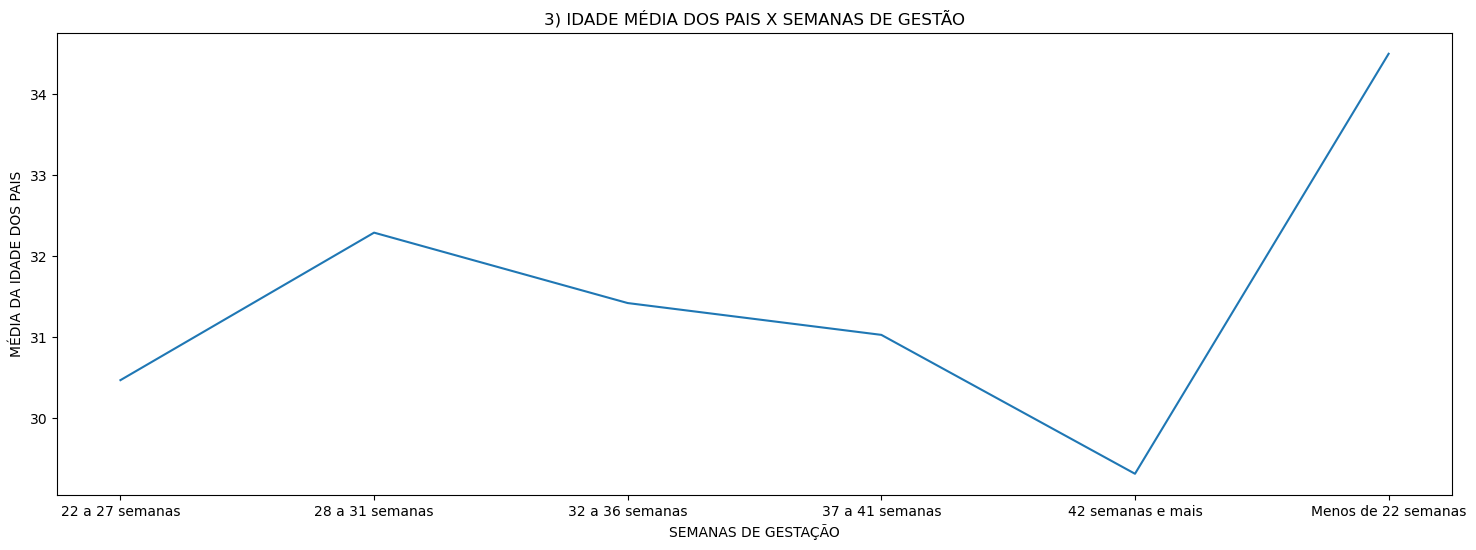

In [189]:
resultado = sinasc.groupby('GESTACAO')['IDADEPAI'].mean().plot(figsize=[18,6])
plt.title('3) IDADE MÉDIA DOS PAIS X SEMANAS DE GESTÃO')
plt.xlabel('SEMANAS DE GESTAÇÃO')
plt.ylabel('MÉDIA DA IDADE DOS PAIS')

Text(0, 0.5, 'TOTAL CONSULTAS')

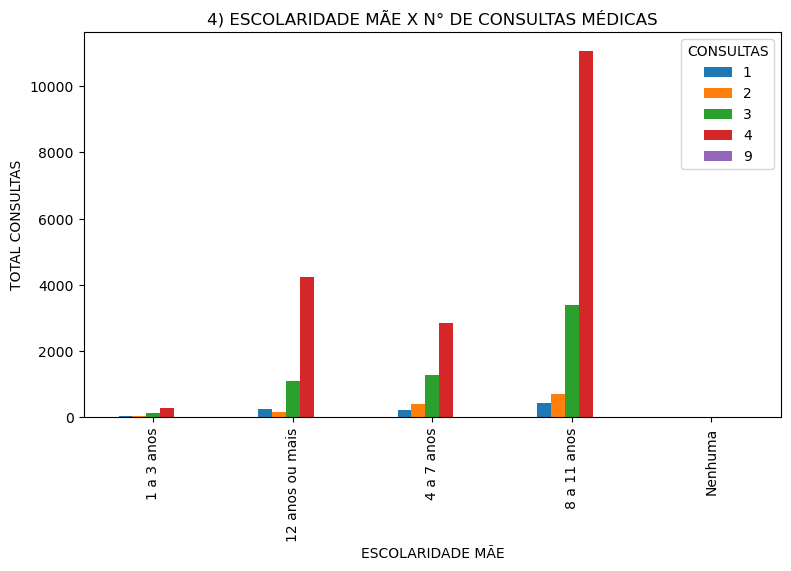

In [193]:
sinasc.groupby(['ESCMAE', 'CONSULTAS'])['IDADEMAE'].count().unstack().plot(kind= 'bar',figsize=[9,5])
plt.title('4) ESCOLARIDADE MÃE X N° DE CONSULTAS MÉDICAS')
plt.xlabel('ESCOLARIDADE MÃE')
plt.ylabel('TOTAL CONSULTAS')

Text(0.5, 0, 'N° DE CONSULTAS')

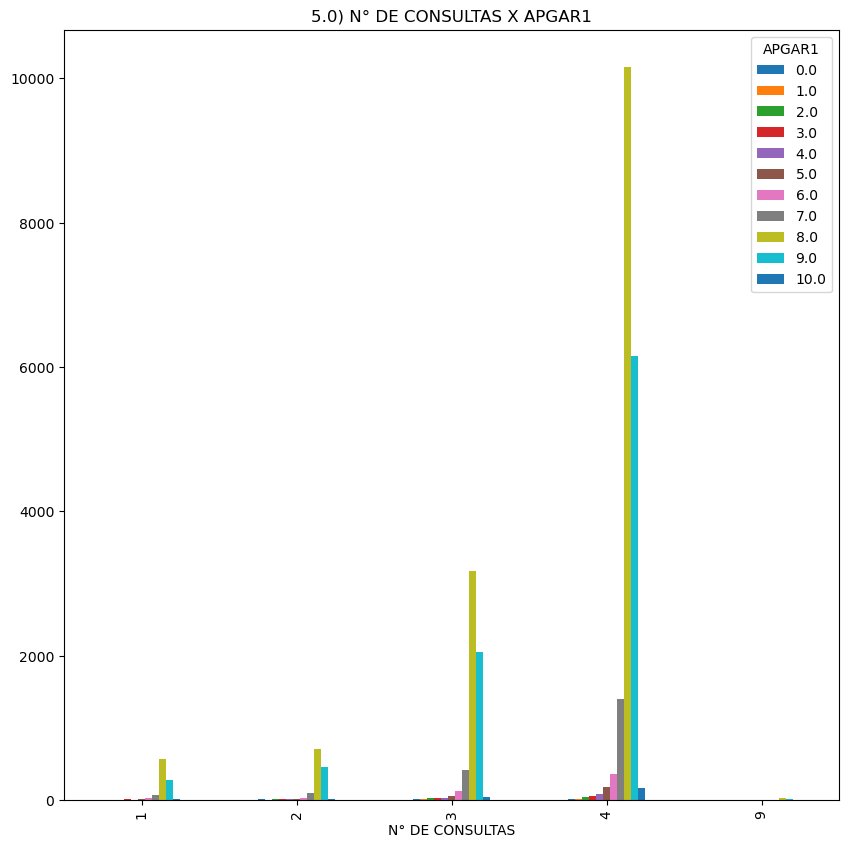

In [215]:
sinasc.groupby(['CONSULTAS', 'APGAR1'])['IDADEMAE'].count().unstack().plot(kind='bar', figsize=[10,10])
plt.title('5.0) N° DE CONSULTAS X APGAR1')
plt.xlabel('N° DE CONSULTAS')

Text(0.5, 0, 'N° DE CONSULTAS')

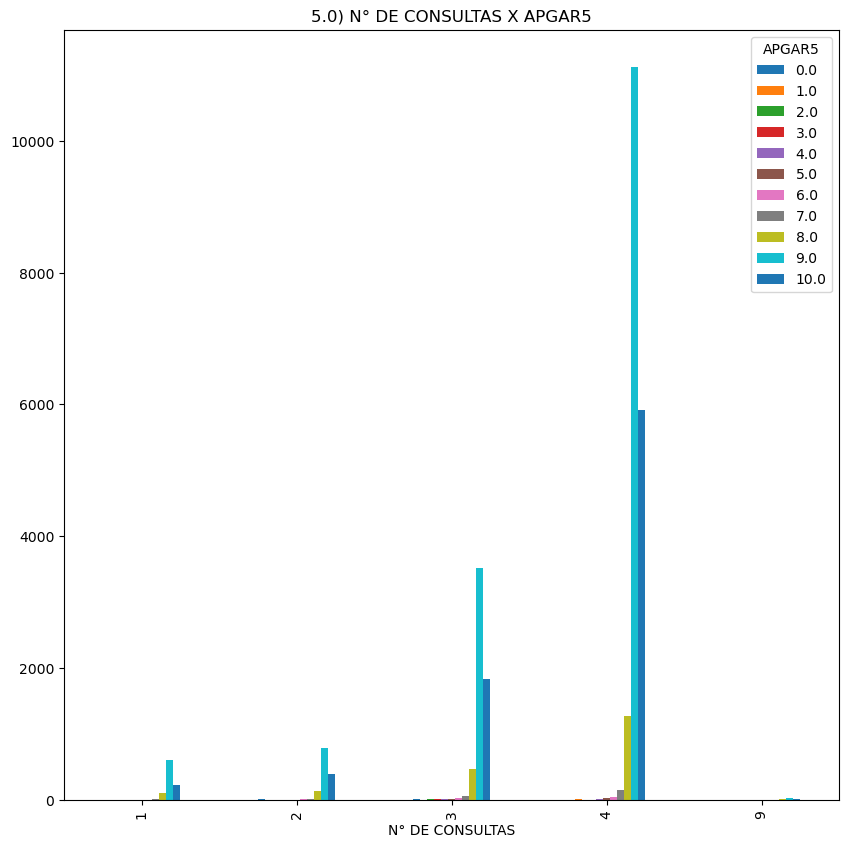

In [216]:
sinasc.groupby(['CONSULTAS', 'APGAR5'])['IDADEMAE'].count().unstack().plot(kind='bar', figsize=[10,10])
plt.title('5.0) N° DE CONSULTAS X APGAR5')
plt.xlabel('N° DE CONSULTAS')

### Insights
Nos gráficos acima podemos analisar:
1) Que a grande parte das crianças nasceu com 37 a 41 semanas de gestação.
2) Quanto mais jovens as mães tendem a ser, maiores são as chances de uma gestação com menos semanas, o que pode impactar na saúde do bebê.
3) Pais com idade superior a 33 anos tendem a ter parceiras gestantes com menos de 22 semanas.
4) Mães com mais tempo de estudo frequentaram mais vezes consultas médicas. Nesse aspecto, acredito que podemos avaliar possíveis variáveis relacionadas, como: possuir plano de saúde, disponibilidade de horários e outros fatores.
5) Por sua vez, mães que passaram por consultas médicas mais frequentemente tiveram bebês com menos chances de nascerem com pontuações baixas no APGAR1 e APGAR5